In [1]:
import mozo
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np



In [2]:
import pandas as pd
train = pd.read_hdf('~/pml7/module3/input/train.car_price.h5')
test = pd.read_hdf('~/pml7/module3/input/test.car_price.h5') #zbiór testowy bez odpowiedzi



for cl in [col for col in train if col.startswith('feature_')]: 
    print(cl)
    train[cl] = train.apply(lambda row: 1 if row[cl] else 0, axis=1)
    print(train[cl].value_counts())
    test[cl] = test.apply(lambda row: 1 if row[cl] else 0, axis=1)    
    print(test[cl].value_counts())


In [4]:
train, test = mozo.merge_with_features('ft_created_at_unix_train.csv', train, test)
train, test = mozo.merge_with_features('ft_latitude_longitude_train.csv', train, test)
train, test = mozo.merge_with_features('ft_price_test.csv', train, test)
train, test = mozo.merge_with_features('ft_new_param_test.csv', train, test)


train
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
test
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
train
Index(['car_id', 'latitude', 'latitude_na_mean', 'longitude',
       'longitude_na_mean'],
      dtype='object')
test
Index(['car_id', 'latitude', 'latitude_na_mean', 'longitude',
       'longitude_na_mean'],
      dtype='object')
train
Index(['car_id', 'pln_to_eur', 'price_value_pln',
       'price_value_pln_log_transl'],
      dtype='object')
test
Index(['car_id', 'pln_to_eur'], dtype='object')
train
Index(['car_id', 'new_param_rok-produkcji',
       'new_param_rok_produkcji_minus_aktualny_rok',
       'new_param_pierwsza-rejestracja-date', 'new_param_przebieg',
       'new_param_moc', 'new_param_pojemność-skokowa',
       'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
       'new_param_pierwsza_rejestracja_ten_rok',
       'new_param_pierwsza_rejestracja_poprzedni_rok',
       'new_param_pierwsza_rejest

In [60]:
train['isTrain'] = True
test['isTrain'] = False
total = pd.concat([train, test], ignore_index=True)

print("The original data set contains: {} rows and {} columns".format(total.shape[0], total.shape[1]))
print("Features of the original data set:\n", list(total.columns))

# number of categorical features
print("Number of categorical features : {}".format(len(total.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(total.select_dtypes(include=['int64', 'float64']).columns)))

#mozo.how_many_levels(total)


The original data set contains: 160616 rows and 201 columns
Features of the original data set:
 ['breadcrumb', 'created_at', 'price_currency', 'price_details', 'price_value', 'seller_address', 'seller_name', 'seller_type', 'feature_czujniki-parkowania-przednie', 'feature_poduszka-powietrzna-chroniąca-kolana', 'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa', 'feature_światła-led', 'feature_czujnik-zmierzchu', 'feature_elektrycznie-ustawiane-lusterka', 'feature_asr-(kontrola-trakcji)', 'feature_poduszka-powietrzna-kierowcy', 'feature_cd', 'feature_elektryczne-szyby-przednie', 'feature_poduszka-powietrzna-pasażera', 'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej', 'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne', 'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa', 'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne', 'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne', 'feature_regulowane-zawieszenie', 'feature_og

# zm features Principal Component Analysis for Binomial
* https://stats.stackexchange.com/questions/16331/doing-principal-component-analysis-or-factor-analysis-on-binary-data
* https://arxiv.org/pdf/1410.7404.pdf
* https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/

In [39]:
vars_features = [col for col in train if col.startswith('feature_')]
vars_bool_params = ['new_param_serwisowany-w-aso', 'new_param_pierwszy-właściciel', 'new_param_bezwypadkowy',
                'new_param_zarejestrowany-w-polsce', 'new_param_uszkodzony', 'new_param_leasing-concession', 
                'new_param_możliwość-finansowania', 'new_param_metalik', 'new_param_perłowy', 'new_param_akryl-(niemetalizowany)']
vars_bool_years = [
           'new_param_pierwsza_rejestracja_ten_rok', 'new_param_pierwsza_rejestracja_poprzedni_rok', 'new_param_pierwsza_rejestracja_2_lata', 'new_param_pierwsza_rejestracja_3_lata',
           'new_param_pierwsza_rejestracja_4_5_lat', 'new_param_pierwsza_rejestracja_6_7_lat', 'new_param_pierwsza_rejestracja_8_10_lat', 'new_param_pierwsza_rejestracja_11_15_lat', 'new_param_pierwsza_rejestracja_16_wiecej_lat',
            'new_param_rok-produkcji_ten_rok', 'new_param_rok-produkcji_poprzedni_rok', 'new_param_rok-produkcji_2_lata', 'new_param_rok-produkcji_3_lata',
           'new_param_rok-produkcji_4_5_lat', 'new_param_rok-produkcji_6_7_lat', 'new_param_rok-produkcji_8_10_lat', 'new_param_rok-produkcji_11_15_lat', 'new_param_rok-produkcji_16_wiecej_lat',
]

filter_col = [ *vars_features,
              *vars_bool_params,
              *vars_bool_years
             ] 
total[filter_col].head()

,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,...,new_param_pierwsza_rejestracja_16_wiecej_lat,new_param_rok-produkcji_ten_rok,new_param_rok-produkcji_poprzedni_rok,new_param_rok-produkcji_2_lata,new_param_rok-produkcji_3_lata,new_param_rok-produkcji_4_5_lat,new_param_rok-produkcji_6_7_lat,new_param_rok-produkcji_8_10_lat,new_param_rok-produkcji_11_15_lat,new_param_rok-produkcji_16_wiecej_lat
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False


In [40]:
print(total[filter_col].nunique())
#train[filter_col].values

feature_czujniki-parkowania-przednie            2
feature_poduszka-powietrzna-chroniąca-kolana    2
feature_kurtyny-powietrzne                      2
feature_klimatyzacja-dwustrefowa                2
feature_światła-led                             2
                                               ..
new_param_rok-produkcji_4_5_lat                 1
new_param_rok-produkcji_6_7_lat                 1
new_param_rok-produkcji_8_10_lat                1
new_param_rok-produkcji_11_15_lat               1
new_param_rok-produkcji_16_wiecej_lat           1
Length: 98, dtype: int64


np.isnan(train[filter_col].values).any()


In [41]:
# https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [42]:
X = total[filter_col].values
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#X = X - 1 * np.min(X)
print(np.min(X))
print(np.max(X))
pd.DataFrame(X).head()

False
True


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False


In [43]:
mca = prince.MCA(
        n_components=25,
        n_iter=300,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=3400
        )

total_mca = mca.fit(X)

In [50]:
print(total_mca)
print(total_mca.explained_inertia_)
print(np.sum(total_mca.explained_inertia_))
total_mca_predicted = pd.DataFrame(total_mca.transform(X))
total_mca_predicted

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=25,
    n_iter=300, random_state=3400)
[0.20499544010114892, 0.06831723281123737, 0.03701512594471553, 0.029971115875326453, 0.023854306761263072, 0.019837608836738237, 0.018849052899701766, 0.017363586002646737, 0.01559390356365877, 0.014856482551229183, 0.014224893744058588, 0.013753680518946551, 0.013268951090674193, 0.012723091584229886, 0.012303359848402888, 0.011462840778970534, 0.011404099184698686, 0.011274810585094903, 0.011233638823967792, 0.011018894452547364, 0.010853738487563939, 0.010463334739589351, 0.01022721000494569, 0.009928353941292446, 0.009847892597510424]
0.6246426457301593


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.438816,0.211026,-0.101869,-0.056309,-0.084358,-0.162504,0.074287,-0.090953,0.099969,0.004588,...,0.012949,0.117173,0.045461,-0.018640,-0.066024,-0.099811,0.033429,0.248359,0.259247,-0.064809
1,-0.288050,-0.182617,0.117817,0.041249,-0.033674,0.046754,-0.053403,0.056688,-0.006103,0.083371,...,-0.138408,-0.083746,-0.071336,0.018879,0.156943,0.176722,-0.012581,0.081553,-0.081498,-0.073336
2,1.079793,0.547528,0.548805,0.333640,0.243562,-0.007148,0.285825,0.122175,0.234713,-0.168240,...,-0.098063,0.012348,0.090238,-0.041826,0.057918,0.008142,-0.382586,-0.290717,0.078844,0.112464
3,-0.063112,-0.086810,0.083262,-0.022838,0.090347,0.064298,-0.078992,0.078327,-0.034932,-0.098204,...,-0.137305,0.168775,0.142112,-0.050436,0.060051,0.031991,0.076084,0.261332,0.017414,0.068339
4,0.647092,0.339155,-0.173333,0.328817,-0.062058,-0.129935,-0.191146,0.088745,-0.264460,0.021090,...,0.292668,0.005533,0.045656,-0.052548,0.133644,0.143678,-0.304969,0.070760,0.215672,-0.171289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160611,0.384322,-0.103358,-0.156939,-0.208713,0.227709,-0.184457,0.034590,-0.071497,0.050747,0.092148,...,0.052432,-0.001632,-0.059516,0.034517,-0.055496,-0.136936,-0.215547,-0.046355,-0.050099,-0.163880
160612,-0.134181,-0.229966,0.029967,-0.046970,0.041235,-0.091798,-0.031880,-0.045158,-0.158598,-0.065687,...,0.080182,-0.031481,0.055644,-0.024887,0.048151,0.114952,0.035799,-0.096558,-0.018761,0.017271
160613,-0.040868,-0.197505,0.010702,-0.065388,0.274493,-0.239139,0.063430,-0.177561,-0.045465,0.059191,...,-0.010771,-0.089112,-0.149385,0.051952,0.018032,-0.084696,0.041918,0.057390,0.248681,0.211134
160614,-0.321182,-0.210154,0.132016,0.161204,0.037429,0.018127,-0.031677,0.034689,-0.019588,-0.043424,...,0.162669,-0.049136,-0.083188,0.022162,-0.024605,0.017669,0.019113,-0.006168,-0.089312,-0.070359


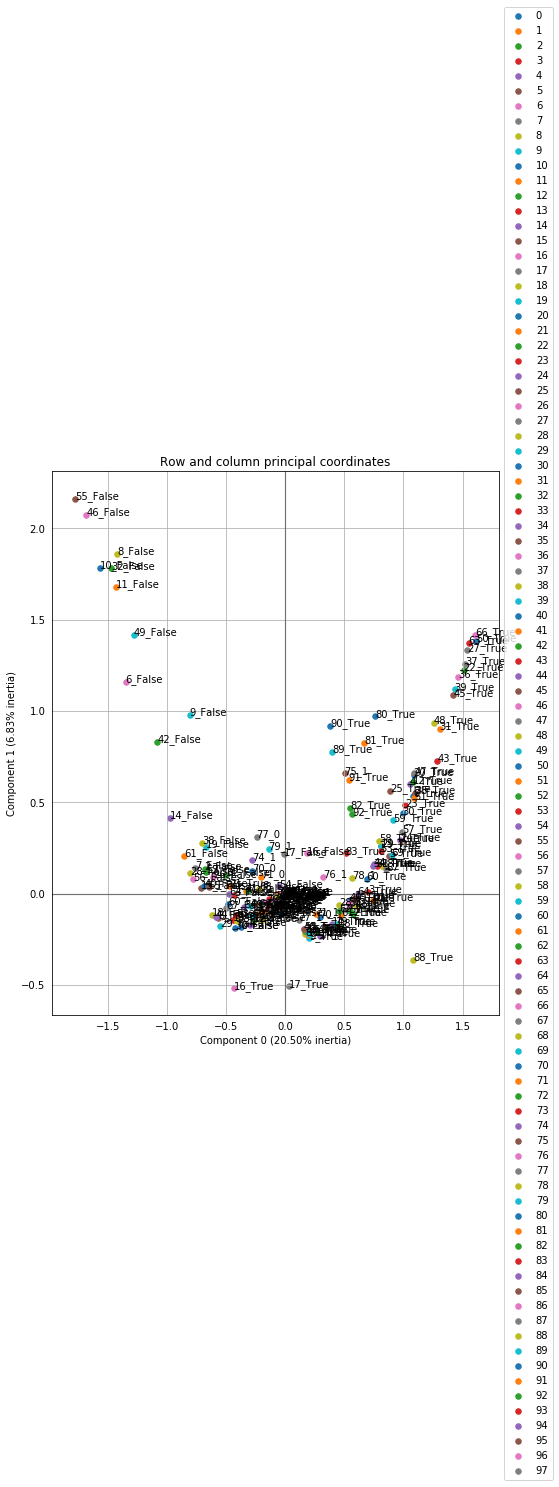

In [51]:
ax = total_mca.plot_coordinates(
        X=X,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [66]:
total_mca = pd.concat([total[['isTrain', 'car_id']], total_mca_predicted], axis=1)

for cl in total_mca.columns[1:]:
    if cl != 'isTrain' and cl != 'car_id':
        total_mca.rename(columns={cl: 'mca_' + str(cl)}, inplace=True)

total_mca.head()

,isTrain,car_id,mca_0,mca_1,mca_2,mca_3,mca_4,mca_5,mca_6,mca_7,...,mca_15,mca_16,mca_17,mca_18,mca_19,mca_20,mca_21,mca_22,mca_23,mca_24
0,True,0,-0.438816,0.211026,-0.101869,-0.056309,-0.084358,-0.162504,0.074287,-0.090953,...,0.012949,0.117173,0.045461,-0.018640,-0.066024,-0.099811,0.033429,0.248359,0.259247,-0.064809
1,True,2,-0.288050,-0.182617,0.117817,0.041249,-0.033674,0.046754,-0.053403,0.056688,...,-0.138408,-0.083746,-0.071336,0.018879,0.156943,0.176722,-0.012581,0.081553,-0.081498,-0.073336
2,True,3,1.079793,0.547528,0.548805,0.333640,0.243562,-0.007148,0.285825,0.122175,...,-0.098063,0.012348,0.090238,-0.041826,0.057918,0.008142,-0.382586,-0.290717,0.078844,0.112464
3,True,4,-0.063112,-0.086810,0.083262,-0.022838,0.090347,0.064298,-0.078992,0.078327,...,-0.137305,0.168775,0.142112,-0.050436,0.060051,0.031991,0.076084,0.261332,0.017414,0.068339
4,True,5,0.647092,0.339155,-0.173333,0.328817,-0.062058,-0.129935,-0.191146,0.088745,...,0.292668,0.005533,0.045656,-0.052548,0.133644,0.143678,-0.304969,0.070760,0.215672,-0.171289


In [73]:
train_mca = total_mca.loc[total_mca['isTrain'], ]
train_mca = train_mca.drop('isTrain', axis=1)

test_mca = total_mca.loc[~total_mca['isTrain'], ]
test_mca = test_mca.drop('isTrain', axis=1)
test_mca

,car_id,mca_0,mca_1,mca_2,mca_3,mca_4,mca_5,mca_6,mca_7,mca_8,...,mca_15,mca_16,mca_17,mca_18,mca_19,mca_20,mca_21,mca_22,mca_23,mca_24
106494,1,-0.491258,-0.108785,0.070167,0.255259,-0.003922,-0.017336,0.009401,0.013943,0.215992,...,0.017888,0.062283,0.009227,-0.002913,0.014038,-0.084999,0.010917,0.000358,0.036295,0.054079
106495,8,0.479095,0.019235,0.007383,-0.221435,-0.064446,0.162628,-0.093409,0.174133,0.033943,...,0.048998,-0.038466,-0.017666,0.007997,-0.109117,0.003580,0.039900,0.121613,0.014250,-0.014333
106496,9,-0.191238,-0.170682,-0.136965,0.142234,0.083116,0.027679,0.070222,-0.044413,0.039734,...,-0.100401,0.006269,0.041835,-0.019468,-0.003753,0.030950,0.087657,-0.063113,0.021591,-0.023042
106497,12,-0.418444,-0.006366,-0.056341,0.114130,0.051898,0.077887,-0.014592,0.061795,0.055698,...,-0.075734,0.045796,-0.076319,0.018966,0.014952,-0.077873,0.125853,-0.005007,0.025965,-0.102709
106498,14,-0.594750,0.175745,0.175512,0.059253,-0.106572,0.032604,-0.031605,0.059285,0.211066,...,0.069717,-0.027521,0.038978,-0.011789,0.006570,0.122386,0.048837,-0.021583,-0.073449,-0.023595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160611,160602,0.384322,-0.103358,-0.156939,-0.208713,0.227709,-0.184457,0.034590,-0.071497,0.050747,...,0.052432,-0.001632,-0.059516,0.034517,-0.055496,-0.136936,-0.215547,-0.046355,-0.050099,-0.163880
160612,160603,-0.134181,-0.229966,0.029967,-0.046970,0.041235,-0.091798,-0.031880,-0.045158,-0.158598,...,0.080182,-0.031481,0.055644,-0.024887,0.048151,0.114952,0.035799,-0.096558,-0.018761,0.017271
160613,160607,-0.040868,-0.197505,0.010702,-0.065388,0.274493,-0.239139,0.063430,-0.177561,-0.045465,...,-0.010771,-0.089112,-0.149385,0.051952,0.018032,-0.084696,0.041918,0.057390,0.248681,0.211134
160614,160612,-0.321182,-0.210154,0.132016,0.161204,0.037429,0.018127,-0.031677,0.034689,-0.019588,...,0.162669,-0.049136,-0.083188,0.022162,-0.024605,0.017669,0.019113,-0.006168,-0.089312,-0.070359


In [74]:
train_mca.to_csv('output/ft_mca_train.csv', index=False) 
test_mca.to_csv('output/ft_mca_test.csv', index=False)

# Principal Component Analysis take 2 tylko features
- https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

In [76]:
vars_features = [col for col in train if col.startswith('feature_')]
vars_bool_params = ['new_param_serwisowany-w-aso', 'new_param_pierwszy-właściciel', 'new_param_bezwypadkowy',
                'new_param_zarejestrowany-w-polsce', 'new_param_uszkodzony', 'new_param_leasing-concession', 
                'new_param_możliwość-finansowania', 'new_param_metalik', 'new_param_perłowy', 'new_param_akryl-(niemetalizowany)']
vars_bool_years = [
           'new_param_pierwsza_rejestracja_ten_rok', 'new_param_pierwsza_rejestracja_poprzedni_rok', 'new_param_pierwsza_rejestracja_2_lata', 'new_param_pierwsza_rejestracja_3_lata',
           'new_param_pierwsza_rejestracja_4_5_lat', 'new_param_pierwsza_rejestracja_6_7_lat', 'new_param_pierwsza_rejestracja_8_10_lat', 'new_param_pierwsza_rejestracja_11_15_lat', 'new_param_pierwsza_rejestracja_16_wiecej_lat',
            'new_param_rok-produkcji_ten_rok', 'new_param_rok-produkcji_poprzedni_rok', 'new_param_rok-produkcji_2_lata', 'new_param_rok-produkcji_3_lata',
           'new_param_rok-produkcji_4_5_lat', 'new_param_rok-produkcji_6_7_lat', 'new_param_rok-produkcji_8_10_lat', 'new_param_rok-produkcji_11_15_lat', 'new_param_rok-produkcji_16_wiecej_lat',
]

filter_col = [ *vars_features,
              #*vars_bool_params,
              #*vars_bool_years
             ] 
total[filter_col].head()



,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,...,feature_gniazdo-aux,feature_esp-(stabilizacja-toru-jazdy),feature_alarm,feature_podgrzewane-tylne-siedzenia,feature_mp3,feature_tempomat,feature_hud-(wyświetlacz-przezierny),feature_elektrochromatyczne-lusterko-wsteczne,feature_relingi-dachowe,feature_elektrochromatyczne-lusterka-boczne
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,False,False,True,False,True,True,False,False,False,False
4,True,True,True,False,True,True,True,True,True,True,...,True,True,True,False,True,False,False,False,False,False


In [77]:
X = total[filter_col].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#X = X - 1 * np.min(X)
print(np.min(X))
print(np.max(X))
pd.DataFrame(X).head()

-3.3575203074305575
8.296568174749176


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.586754,-0.490973,-1.089854,-0.781826,-0.531591,-0.804482,-2.364300,0.804304,-2.887396,-1.997792,...,-0.837499,0.744559,-1.045161,-0.186128,-0.880941,-1.051795,-0.157524,-0.762166,-0.604012,1.734787
1,-0.586754,-0.490973,-1.089854,1.279057,-0.531591,-0.804482,0.422958,0.804304,0.346333,0.500552,...,-0.837499,-1.343076,-1.045161,-0.186128,-0.880941,-1.051795,-0.157524,-0.762166,-0.604012,-0.576440
2,1.704291,2.036773,0.917554,1.279057,1.881147,1.243036,0.422958,0.804304,0.346333,0.500552,...,1.194031,0.744559,0.956790,5.372651,1.135149,0.950755,-0.157524,1.312050,1.655596,1.734787
3,-0.586754,-0.490973,-1.089854,-0.781826,-0.531591,1.243036,0.422958,0.804304,0.346333,0.500552,...,-0.837499,-1.343076,0.956790,-0.186128,1.135149,0.950755,-0.157524,-0.762166,-0.604012,-0.576440
4,1.704291,2.036773,0.917554,-0.781826,1.881147,1.243036,0.422958,0.804304,0.346333,0.500552,...,1.194031,0.744559,0.956790,-0.186128,1.135149,-1.051795,-0.157524,-0.762166,-0.604012,-0.576440


In [95]:
import numpy as np 
import pandas as pd

#### to samo co poprzednio #####
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(np.min(X_scaled))
print(np.max(X_scaled))
#pd.DataFrame(X_scaled).head()

-3.357520307430559
8.296568174749176


In [80]:
features = X_scaled.T
cov_matrix = np.cov(features)
pd.DataFrame(cov_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.000006,0.307748,0.311973,0.363194,0.456520,0.496150,0.213982,0.316168,0.135546,0.118940,...,0.337627,0.316839,0.271730,0.231345,0.282744,0.363508,0.199055,0.425167,0.206097,0.341203
1,0.307748,1.000006,0.328424,0.236378,0.312979,0.334691,0.179062,0.270247,0.145307,0.139520,...,0.289859,0.263809,0.216889,0.158644,0.262441,0.240828,0.124567,0.330739,0.137935,0.313659
2,0.311973,0.328424,1.000006,0.364881,0.280239,0.435144,0.366107,0.422328,0.312951,0.281588,...,0.365710,0.483518,0.272199,0.112355,0.370054,0.396941,0.099004,0.419560,0.230291,0.296296
3,0.363194,0.236378,0.364881,1.000006,0.267141,0.436365,0.281649,0.332492,0.197498,0.190800,...,0.279145,0.350466,0.241055,0.070026,0.268220,0.438483,0.074349,0.405306,0.229320,0.263671
4,0.456520,0.312979,0.280239,0.267141,1.000006,0.427648,0.179036,0.286164,0.111049,0.035170,...,0.375800,0.294447,0.203954,0.181125,0.324176,0.292164,0.189413,0.324447,0.143292,0.240114


In [82]:
values, vectors = np.linalg.eig(cov_matrix)
pd.DataFrame(values).head()
pd.DataFrame(vectors).head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.150021,0.130014,-0.008455,0.006937,0.155456,0.029914,-0.012518,0.121060,0.010064,-0.068540,...,0.039261,-0.080104,0.080519,0.013908,0.018933,0.035038,-0.219208,0.144237,0.047644,0.030964
1,0.112900,0.060614,-0.026768,0.042474,-0.224048,-0.074652,-0.061072,0.106938,0.199860,-0.104999,...,-0.053309,-0.029353,-0.121068,0.015969,0.025297,0.033150,-0.049435,0.195072,0.141853,0.119984
2,0.147049,-0.049978,-0.112678,-0.050052,-0.177138,-0.043225,-0.132098,-0.155093,0.086391,0.107887,...,-0.198450,-0.072117,0.316262,-0.381157,-0.146396,-0.081862,0.192771,0.122274,-0.083416,-0.018514
3,0.130154,0.007075,-0.134033,-0.209350,0.116719,-0.101387,0.035380,0.088216,-0.010435,0.012204,...,-0.104123,0.190478,0.197789,0.016847,0.052546,0.062872,-0.006073,0.139923,-0.052839,0.072815
4,0.131219,0.119334,-0.116429,0.187523,0.117574,0.025631,0.038643,0.046955,-0.025204,-0.016190,...,0.099415,0.054409,0.115772,-0.012284,0.014583,0.069256,0.032011,-0.107907,-0.079491,0.031794


In [86]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), "\n", explained_variances)


1.0000000000000002 
 [0.2551706462109091, 0.08357736366200359, 0.03941317510095613, 0.036149899761568426, 0.023232585083651704, 0.01905389948581766, 0.018811429463273202, 0.016855130228914054, 0.01583097796893508, 0.015396731667045112, 0.014256558080145072, 0.00182041544468831, 0.013757302310079933, 0.0024498456509043265, 0.012996294153252496, 0.012610138468387433, 0.003237916593070707, 0.0033810614648433334, 0.0034961245497061267, 0.01228391827729899, 0.012077050394180677, 0.011653108015166575, 0.011549426811443457, 0.011334248389322637, 0.004390644611685028, 0.011101212250283274, 0.004565433811682671, 0.010885278396904332, 0.01075706907589305, 0.010643564073874222, 0.010582794792588479, 0.010470081313966897, 0.004797724111428738, 0.004968962621577602, 0.00983462872376892, 0.009770481095702508, 0.0052181385426106055, 0.005309789278632535, 0.00957790179244374, 0.009455245912021005, 0.00932195357053263, 0.009243207932892959, 0.005488942197432359, 0.005621301255365541, 0.0057068439149963

In [94]:
explained_variances_cumulative = []
current = 0.0
for i in range(len(values)):
    current += values[i] / np.sum(values)
    explained_variances_cumulative.append(current)
 
print(explained_variances_cumulative[0:40])


[0.2551706462109091, 0.3387480098729127, 0.37816118497386886, 0.41431108473543726, 0.437543669819089, 0.45659756930490664, 0.4754089987681798, 0.4922641289970939, 0.508095106966029, 0.5234918386330741, 0.5377483967132192, 0.5395688121579075, 0.5533261144679875, 0.5557759601188919, 0.5687722542721444, 0.5813823927405318, 0.5846203093336025, 0.5880013707984458, 0.591497495348152, 0.603781413625451, 0.6158584640196317, 0.6275115720347983, 0.6390609988462418, 0.6503952472355644, 0.6547858918472494, 0.6658871040975327, 0.6704525379092153, 0.6813378163061197, 0.6920948853820127, 0.7027384494558869, 0.7133212442484754, 0.7237913255624423, 0.7285890496738711, 0.7335580122954487, 0.7433926410192176, 0.7531631221149202, 0.7583812606575308, 0.7636910499361633, 0.7732689517286071, 0.7827241976406281]


In [96]:
train['isTrain'] = True
test['isTrain'] = False
total = pd.concat([train, test], ignore_index=True)


In [109]:
total_pca_predicted = pd.DataFrame()

for i in np.arange(0,40):
    total_pca_predicted['pca_' + str(i)] = X_scaled.dot(vectors.T[i])

total_pca_predicted

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39
0,-4.345866,1.875012,-0.857454,0.000929,-0.802825,0.637146,-0.012538,-1.003708,0.417050,0.944804,...,-1.285155,0.498363,0.318793,0.166970,-0.160528,-0.904321,0.137447,-1.102236,0.729488,-1.734558
1,-2.916802,-1.854013,1.332471,-0.645149,1.728529,-0.914494,0.397675,0.813538,-1.288145,-0.328367,...,-0.996484,0.034910,0.119123,-0.064282,-0.357192,-0.357860,-0.034951,0.235858,0.404226,0.232392
2,10.724235,5.870940,6.073958,-0.042302,-2.769630,4.097696,-0.175303,-1.120239,-3.250699,0.660063,...,-2.347352,-2.348178,0.094755,-0.178291,-1.162093,-1.232023,-0.190102,-0.012744,-0.679334,-1.121476
3,-0.657217,-0.708115,0.685728,-0.719917,0.497146,-0.024008,-0.999459,0.030031,-1.688358,2.313170,...,0.598452,-0.452787,-0.303445,-0.717185,-0.306688,0.645044,0.564442,0.936159,-0.683544,0.953539
4,6.086477,2.900281,0.635495,3.478093,1.190605,-2.360711,0.366130,-1.666983,1.568385,-1.707125,...,0.430248,2.357619,0.220548,-0.332434,-0.804734,1.036269,1.002536,-0.144132,0.281657,1.213276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160611,3.479449,-1.033121,-1.672871,-0.988530,-3.087589,-1.147908,0.449722,1.608753,0.537713,-1.043962,...,1.345318,-1.547961,-0.622426,0.031360,0.004572,-0.259572,0.100261,-0.068855,0.033622,-2.396822
160612,-1.288908,-2.094469,0.229825,-0.570875,-0.525328,-0.904196,-1.465439,-0.673692,0.635335,0.926058,...,0.970465,0.526495,-0.089101,0.128522,1.007823,0.557263,0.112425,0.618155,-0.740740,0.630853
160613,-0.646367,-1.683475,0.175772,-0.255548,-3.023026,-1.184111,0.181040,0.128776,1.486597,-0.023051,...,-0.308259,-0.144698,-0.382359,-1.647925,0.908881,0.087965,1.261679,0.279846,0.879537,1.371779
160614,-3.070066,-1.909863,1.941491,0.541400,-0.003720,0.216327,-0.507902,-0.744923,0.808437,-1.231390,...,0.505611,-0.631350,0.289962,0.153917,-0.498770,0.390274,-0.144561,-0.377434,0.844295,-0.370894


In [111]:
total_pca = pd.concat([total[['isTrain', 'car_id']], total_pca_predicted], axis=1)

total_pca

,isTrain,car_id,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,...,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39
0,True,0,-4.345866,1.875012,-0.857454,0.000929,-0.802825,0.637146,-0.012538,-1.003708,...,-1.285155,0.498363,0.318793,0.166970,-0.160528,-0.904321,0.137447,-1.102236,0.729488,-1.734558
1,True,2,-2.916802,-1.854013,1.332471,-0.645149,1.728529,-0.914494,0.397675,0.813538,...,-0.996484,0.034910,0.119123,-0.064282,-0.357192,-0.357860,-0.034951,0.235858,0.404226,0.232392
2,True,3,10.724235,5.870940,6.073958,-0.042302,-2.769630,4.097696,-0.175303,-1.120239,...,-2.347352,-2.348178,0.094755,-0.178291,-1.162093,-1.232023,-0.190102,-0.012744,-0.679334,-1.121476
3,True,4,-0.657217,-0.708115,0.685728,-0.719917,0.497146,-0.024008,-0.999459,0.030031,...,0.598452,-0.452787,-0.303445,-0.717185,-0.306688,0.645044,0.564442,0.936159,-0.683544,0.953539
4,True,5,6.086477,2.900281,0.635495,3.478093,1.190605,-2.360711,0.366130,-1.666983,...,0.430248,2.357619,0.220548,-0.332434,-0.804734,1.036269,1.002536,-0.144132,0.281657,1.213276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160611,False,160602,3.479449,-1.033121,-1.672871,-0.988530,-3.087589,-1.147908,0.449722,1.608753,...,1.345318,-1.547961,-0.622426,0.031360,0.004572,-0.259572,0.100261,-0.068855,0.033622,-2.396822
160612,False,160603,-1.288908,-2.094469,0.229825,-0.570875,-0.525328,-0.904196,-1.465439,-0.673692,...,0.970465,0.526495,-0.089101,0.128522,1.007823,0.557263,0.112425,0.618155,-0.740740,0.630853
160613,False,160607,-0.646367,-1.683475,0.175772,-0.255548,-3.023026,-1.184111,0.181040,0.128776,...,-0.308259,-0.144698,-0.382359,-1.647925,0.908881,0.087965,1.261679,0.279846,0.879537,1.371779
160614,False,160612,-3.070066,-1.909863,1.941491,0.541400,-0.003720,0.216327,-0.507902,-0.744923,...,0.505611,-0.631350,0.289962,0.153917,-0.498770,0.390274,-0.144561,-0.377434,0.844295,-0.370894


In [112]:
train_pca = total_pca.loc[total_pca['isTrain'], ]
train_pca = train_pca.drop('isTrain', axis=1)

test_pca = total_pca.loc[~total_pca['isTrain'], ]
test_pca = test_pca.drop('isTrain', axis=1)
test_pca

,car_id,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,...,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39
106494,1,-4.674168,-1.037401,1.629862,1.941118,-0.498171,0.282490,3.694606,1.175146,1.512340,...,0.072426,0.085664,-1.481386,0.663669,-0.553369,0.544480,-0.548383,0.776734,-0.177066,0.353323
106495,8,4.686090,0.478824,-1.407530,-1.747389,2.273191,0.959234,0.182256,0.239746,0.473183,...,-0.762443,0.535339,0.954821,0.015337,-1.180342,0.396285,-0.560011,-0.104231,-0.610774,-0.510165
106496,9,-1.919930,-1.705297,-0.279435,2.160075,0.064727,1.559319,-0.828314,-0.109708,-0.297596,...,-0.230257,0.628303,2.008626,-0.277818,-0.500459,-0.166298,0.553365,-0.288367,0.018819,-0.953381
106497,12,-4.112650,-0.060568,0.008133,1.399110,0.570724,0.717067,-0.072203,-0.914497,-0.739080,...,-0.557178,-1.011010,-0.546623,-1.071476,-0.395712,-0.012147,-0.290254,-1.366972,0.009422,-1.104814
106498,14,-5.621392,1.708589,1.301580,-0.432885,0.747597,-0.417337,3.677464,0.541397,0.187541,...,-0.361793,0.368739,0.295907,0.974534,0.247733,0.038179,0.622830,1.740063,-1.081501,0.972480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160611,160602,3.479449,-1.033121,-1.672871,-0.988530,-3.087589,-1.147908,0.449722,1.608753,0.537713,...,1.345318,-1.547961,-0.622426,0.031360,0.004572,-0.259572,0.100261,-0.068855,0.033622,-2.396822
160612,160603,-1.288908,-2.094469,0.229825,-0.570875,-0.525328,-0.904196,-1.465439,-0.673692,0.635335,...,0.970465,0.526495,-0.089101,0.128522,1.007823,0.557263,0.112425,0.618155,-0.740740,0.630853
160613,160607,-0.646367,-1.683475,0.175772,-0.255548,-3.023026,-1.184111,0.181040,0.128776,1.486597,...,-0.308259,-0.144698,-0.382359,-1.647925,0.908881,0.087965,1.261679,0.279846,0.879537,1.371779
160614,160612,-3.070066,-1.909863,1.941491,0.541400,-0.003720,0.216327,-0.507902,-0.744923,0.808437,...,0.505611,-0.631350,0.289962,0.153917,-0.498770,0.390274,-0.144561,-0.377434,0.844295,-0.370894


In [113]:
train_pca.to_csv('output/ft_pca_train.csv', index=False) 
test_pca.to_csv('output/ft_pca_test.csv', index=False)